# Regression Models

Please run the cell below to import libraries needed for this project.

In [2]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
import random
%matplotlib inline

Q1) Implement the linear regression model below. The function (called model) takes in an array of data points, x , and an array of weights, w, and returns a vector y_predicted containing the linear combination for each of the data points. You can assume each data point in x only has one feature.  The length of the vector being returned should be the same as x.

In [3]:
def model(x,w):
    #w[0] is the bias term
    #we can safely assume that w has length of 2 because each data point in x only has one feature
    y_predicted = w[0] + x * w[1]
    return y_predicted

Q2) Implement the least squares function discussed in class below. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented above and return a float indicating the total cost.

In [4]:
def least_squares(w,x,y):
    y_predicted = model(x,w)
    cost = np.mean((y_predicted - y) ** 2)
    return cost

Q3) Write a gradient descent function that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this project. This function should also take in as input an array of x and ys, corresponding to our data. The w,x, and y are given as inputs to the cost funtion and its gradient.

In [5]:
def gradient_descent(g,alpha,max_its,w,x,y):
    gradient = grad(g)
    weights = np.array(w)
    weight_history = np.array([weights])
    cost_history = [g(w,x,y)]

    for i in range(max_its):
      step = gradient(weights, x, y)

      for k in range (len(weights)):
        weights[k] -= (alpha * step[k])

      weight_history = np.insert(np.array(weight_history), i+1, np.array(weights), axis=0)
      cost = g(weights, x, y)
      cost_history.append(cost)
    return weight_history, cost_history

Q4) Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

In [7]:
# import the dataset
## Carefully check the path
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname, delimiter=',')
x_kleibers_law_data = np.log(data[:-1,:])
y_kleibers_law_data = np.log(data[-1:,:])


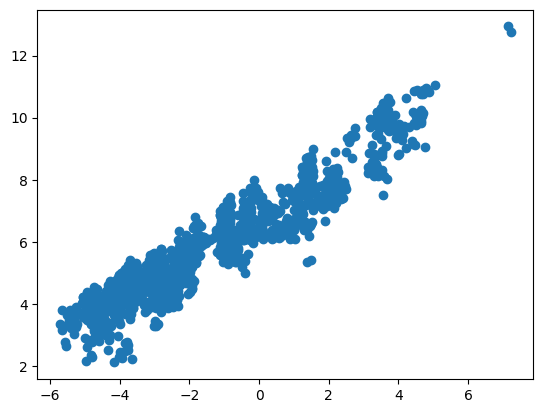

In [8]:
plt.scatter(x_kleibers_law_data, y_kleibers_law_data)
plt.show()

Q5) **[Part 1]** Use your gradient descent function to learn a linear regression model for the x and y above using the following parameters and plot the cost_history over the 1000 iterations

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

In [9]:
#setting variables
w = [random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)]
max_its = 1000
alpha = 0.01

#learn a linear regression model for the x and y above using the above parameters
weight_history, cost_history = gradient_descent(least_squares, alpha, max_its, w, x_kleibers_law_data, y_kleibers_law_data)

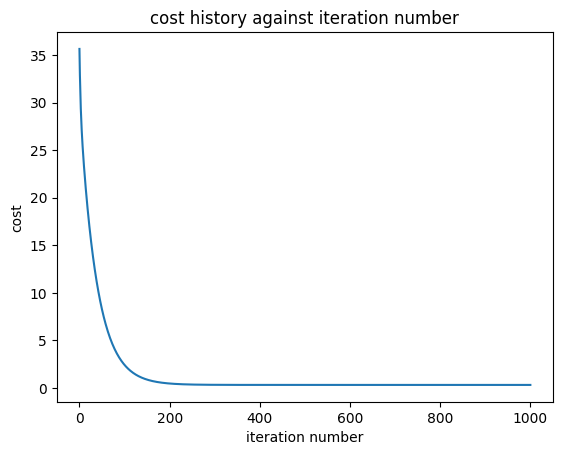

In [10]:
#plot the cost_history against the 1000 iterations
plt.plot(cost_history)
plt.title("cost history against iteration number")
plt.xlabel("iteration number")
plt.ylabel("cost")
plt.show()

Q5) **[Part 2]** Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the linspace method (shown below) to generate a list of xs that you can use for plotting. You need to generate a y for each of the candidate xs using the learned weights. On the same figure, also plot the scatter plot from Q4.


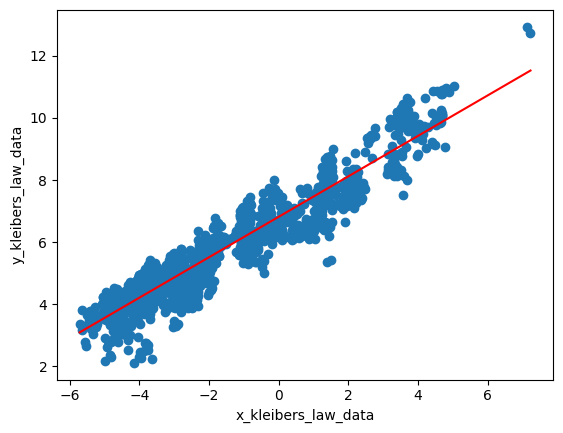

In [11]:
#plotting the scatter plot from Q4
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x_kleibers_law_data = np.log(data[:-1,:])
y_kleibers_law_data = np.log(data[-1:,:])
plt.scatter(x_kleibers_law_data, y_kleibers_law_data)


#using the linspace method to generate a list of xs that I can use for plotting
s = np.linspace(np.min(x_kleibers_law_data), np.max(x_kleibers_law_data))

#picking the weights with the lowest cost
minimum_cost_index = np.argmin(cost_history)
learned_weights = weight_history[minimum_cost_index]

#generating a y for each of the candidate xs using the learned weights
candidate_ys = learned_weights[0] + (learned_weights[1] * s)
plt.plot(s, candidate_ys, color = "red")
plt.xlabel("x_kleibers_law_data")
plt.ylabel("y_kleibers_law_data")
plt.show()

Q6) Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

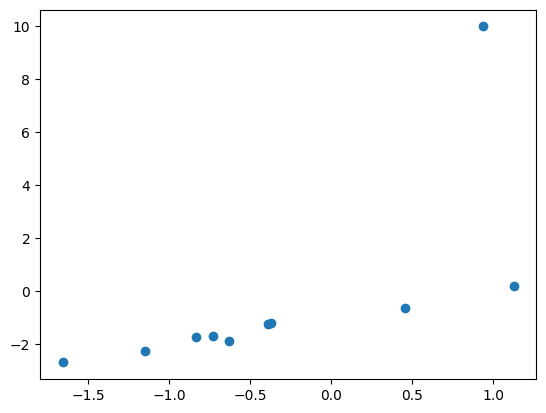

In [12]:
# load in dataset
data = np.loadtxt('regression_outliers.csv',delimiter = ',')
x_regression_outliers = data[:-1,:]
y_regression_outliers = data[-1:,:]
plt.scatter(x_regression_outliers, y_regression_outliers)
plt.show()

Q7) Implement the least absolute deviations function discussed in class. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented in Q1  and return a float indicating the total cost.

In [13]:
def least_absolute_deviations(w,x,y):
    predicted_y = model(x,w)
    return np.mean(np.absolute(predicted_y - y))

 Q8) **[Part 1]** Use the gradient descent function twice to learn two linear models using the new x and y from Q6 using the following parameters and plot the cost_history for both runs on the same plot. Make the plot for the first run blue and the plot for the second run red.

Run 1)
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.1

Run 2)
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.1


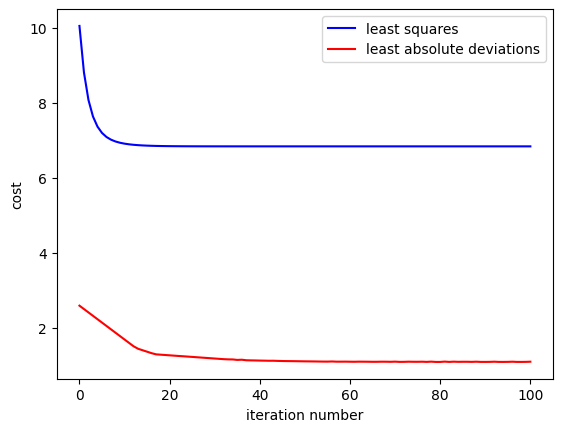

In [14]:
#setting variables
g1 = least_squares
g2 = least_absolute_deviations
w = [1.0, 1.0]
max_its = 100
alpha = 0.1

#learning the first linear model using least squares for the x and y above using the above parameters
weight_history1, cost_history1 = gradient_descent(g1, alpha, max_its, w, x_regression_outliers, y_regression_outliers)

#learning the second linear model using least absolute deviations for the x and y above using the above parameters
weight_history2, cost_history2 = gradient_descent(g2, alpha, max_its, w, x_regression_outliers, y_regression_outliers)

#plotting the cost history for both runs on the same plot
plt.plot(cost_history1, label="least squares", color='blue')
plt.plot(cost_history2, label="least absolute deviations", color='red')
plt.ylabel("cost")
plt.xlabel("iteration number")
leg = plt.legend()
plt.show()


Q8) **[Part 2]** Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the linspace method again to generate a list of xs that you can use. On the same figure, also plot the scatter plot from Q6. Which of these lines look like a better fit to you?


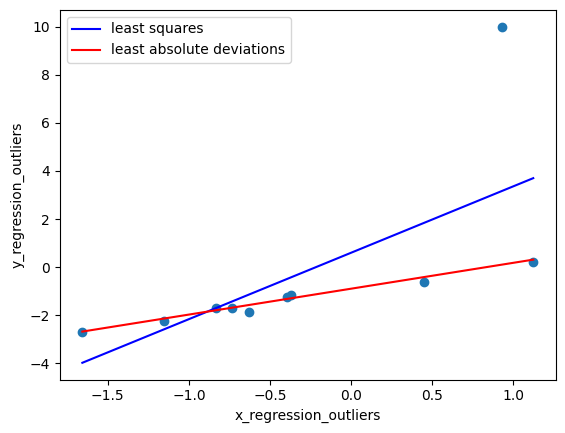

In [15]:
s = np.linspace(np.min(x_regression_outliers),np.max(x_regression_outliers))

#finding the weights with minimum weights
minimum_cost_index1 = np.argmin(cost_history1)
learned_weights1 = weight_history1[minimum_cost_index1]

minimum_cost_index2 = np.argmin(cost_history2)
learned_weights2 = weight_history2[minimum_cost_index2]

#generating a y for each of the candidate xs using the learned weights
candidate_ys1 = learned_weights1[0] + (learned_weights1[1] * s)
candidate_ys2 = learned_weights2[0] + (learned_weights2[1] * s)

#plotting the scatter plot from Q6
x_regression_outliers = data[:-1,:]
y_regression_outliers = data[-1:,:]
plt.scatter(x_regression_outliers, y_regression_outliers)
plt.xlabel("x_regression_outliers")
plt.ylabel("y_regression_outliers")

#plotting the learned weights from the two learned lines
plt.plot(s, candidate_ys1, label="least squares", color='blue')
plt.plot(s, candidate_ys2, label="least absolute deviations", color='red')
leg = plt.legend()
plt.show()

the red line looks like a better fit since that the outlier point can be just a noisy data point that was gathered by mistake

Q9) **[Part 1]** Implement the mean squared error (MSE) and the mean absolute deviation functions from class. The functions should take in as input an array of actual ys and an array of predicted ys and return the prediction error.

In [16]:
def MSE(y_actual,y_pred):
    error = np.mean((y_pred - y_actual)**2)
    return error

def MAD(y_actual,y_pred):
    error = np.mean(np.abs(y_pred - y_actual))
    return error

Q9) **[Part 2]** Use the functions above to report the MSE and MAD for the two models learned in Q8 [Part 1], using the x and y from Q6. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

In [17]:
#generating the predicted ys
pred_ys1 = learned_weights1[0] + (learned_weights1[1] * x_regression_outliers)
pred_ys2 = learned_weights2[0] + (learned_weights2[1] * x_regression_outliers)

#training error for model 1: least squares model
print("least squares model with MSE:", (MSE(y_regression_outliers, pred_ys1)))
print("least squares model with MAD:", MAD(y_regression_outliers, pred_ys1))

#training error for model 2: least absolute deviations model
print("least absolute deviations model with MSE:", MSE(y_regression_outliers, pred_ys2))
print("least absolute deviations model with MAD:", MAD(y_regression_outliers, pred_ys2))

least squares model with MSE: 6.841394300667753
least squares model with MAD: 1.68937055338514
least absolute deviations model with MSE: 9.799137735443463
least absolute deviations model with MAD: 1.0906599905772107


the least absolute deviations model seems to be doing better given that its MAD training error is the lowest. Note that the least absolute deviations model have a greater MSE training error than the least squares model since that the MSE is more sensitive to outliers and penalizes them more harshly.

Q10) Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights

In [18]:
def L2_regularizer(w):
    L2= np.sum(np.abs(w))
    return L2

def L1_regularizer(w):
    L1= np.sum(w**2)
    return L1

Q11) Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (covered in class) using the functions implemented in Q10. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [19]:
def ridge(w,x,y,lmbda):
    cost = least_squares(w, x, y) + (lmbda * L2_regularizer(w))
    return cost

def lasso(w,x,y,lmbda):
    cost = least_absolute_deviations(w, x, y) + (lmbda * L1_regularizer(w))
    return cost

## For the remaining questions we will work with `weatherHistory.csv` dataset

The file 'weatherHistory.csv'has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [20]:
import pandas as pd
data = pd.read_csv('/content/weatherHistory.csv', sep = ',')

 Use the data above to set y to be the temperatures and X to be the following columns (in order): [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure] Basically, we want to see whether we can predict the temperature, using the features in X.

In [21]:
Y = data["Temperature"]
X = data[["Apparent_Temperature", "Humidity", "Wind_Speed", "Wind_Bearing", "Visibility", "Pressure"]]

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

Use the train_test_split to divide your modified data into 80% train, 20% test.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Q12) Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data.

In [24]:
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
model = linear_model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("performance of the model on the test data using sklearn's MSE implementation:", mean_squared_error(y_test, y_pred))

performance of the model on the test data using sklearn's MSE implementation: 0.8930139189260335


Q13) Repeat Q12 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha.

Print the learned parameters for the Ridge and Lasso models (using .coef_). Note that the parameters below correspond to the feature vector ( [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]), in order. I.e., the first value corresponds to "Apparent_Temperature", etc. What is the difference between the ridge and lasso parameters? Which features, if any, have been eliminated by lasso?

In [25]:
ridge_model = Ridge()
model_1 = ridge_model.fit(x_train, y_train)
y_pred_ridge = model_1.predict(x_test)
print("coefficients of the ridge model are:")
print(model_1.coef_)
print()

lasso_model = Lasso()
model_2 = lasso_model.fit(x_train, y_train)
y_pred_lasso = model_2.predict(x_test)
print("coefficients of the lasso model are:")
print(model_2.coef_)
print()
print("ridge model MSE is", mean_squared_error(y_test, y_pred_ridge))
print("lasso model MSE is", mean_squared_error(y_test, y_pred_lasso))

coefficients of the ridge model are:
[ 8.72726182e-01 -1.41082082e+00  7.99208184e-02 -3.94635431e-04
  7.91041445e-03 -2.10113437e-04]

coefficients of the lasso model are:
[ 8.80311601e-01 -0.00000000e+00  6.90790545e-02 -2.46144565e-04
  0.00000000e+00 -1.62996796e-04]

ridge model MSE is 0.8930161642994624
lasso model MSE is 0.9741996637187259


the ridge and lasso parameters are all different from each other but relatively close except for two parameters. In other words, the apparent temperature, wind speed, wind bearing, and pressure features in the ridge model are different from their corresponding features in the lasso model but kind of close to each other (the difference is 1 at maximum) except for two features that have been totally eliminated in the lasso model which are humidity and visibility.